In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as st

In [2]:
df= pd.read_csv('/datasets/games.csv')

In [3]:
df.head() # ознакомление с данными

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


У нас есть таблица с названиями игр, годомо выпуска и платформами, на которых они выпущены, жанром, данными о продажах в трех регионах (Северная Америка, Европа, Япония), оценками критиков  и пользователей, и рейтингом

### Предобработка данных

In [4]:
# приводим названия столбцов к одному регистру
df.columns = list(map(lambda x: x.lower(), df.columns))

In [5]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
# смотрим типы данных и пропуски
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Пропуски есть в столбцах name, year_of_release,  genre, critic_score, user_score, rating .

Пропуски в столбцах year_of_release, genre могли появиться из-за небрежности при вводе данных. Пропуски в столбцах critic_score, user_score могли возникнуть из-за технической ошибки (программа не подсчитала средний рейтинг игры, сложности в синхронизации с ресурсами, где пользователи и критики выставляют свои оценки). Пропуски в столбце rating могли возникнуть из-за того, что игре не был присвоен определенный рейтинг

В большей части из этих столбцов заполнение пропусков предстваляется маловероятным, так как возможно искажение картины. 

Для начала можно 

1) удалить 2 строки, где пропущено название игры (name) , так такое количество не повлияет на анализ   
2) Изменить тип данных столбца user_score на float, заполнить пропуски только если этого потребует смена типа данных

In [7]:
df['critic_score'] = df['critic_score'].astype(float)


In [8]:

df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [9]:
df[df['user_score']== 'tbd']['name'].count()

2424

Мы обнаружили 2424 строки со значением user_score = 'tbd'. Эта аббревиатура означает, что рейтинг неопределен. 
Для того, чтобы изменить тип данных на float можно заменить tbd на NaN

In [10]:
df['user_score'] = df['user_score'].apply(lambda x: None if x == 'tbd' else x)
df['user_score'] = df['user_score'].astype(float)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Итак, мы привели типы данных к нужным. 

Проверим наличие дубликатов.

In [12]:
df.duplicated().sum()

0

In [54]:
#Код ревьюера
df[df[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E,2.56
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,unknown,2.39
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,unknown,0.03
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E,0.01


In [13]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Среди названий платформ неявных дубликатов не обнаружено. Есть разные версии платформ от одних и тех же создателей, но они существовали в разное время, поэтому не считаются дубликатами

In [14]:
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

В строке с годом выпуска дубликатов также нет

In [15]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Среди жанров неявных дубликатов не обнаружено

In [16]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В рейтингах присутствует устаревшее обозначение игр "Для всех" - K-A, которое в 1998 было заменено на E. Так как мы будем анализировать актуальный промежуток времени, а это игры, которые, как минимум  не старше 2000 года, можно посмотреть, встречаются ли эти неявные дубли после 2000 года

In [17]:
df[df['rating'] == 'K-A']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
656,Theme Hospital,PC,1997.0,Strategy,2.30,0.10,0.00,0.00,NaN,9.0,K-A
903,PaRappa The Rapper,PS,1996.0,Misc,0.26,0.16,1.46,0.03,92.0,7.4,K-A
16681,Worms 2,PC,1997.0,Strategy,0.00,0.01,0.00,0.00,NaN,8.1,K-A


Таких игры всего три, и они выпущены ранее 2000 года, поэтому можно проигнорировать эти дубли, в финальную таблицу они не войдут

In [18]:
df[df['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропущенные значения в столбце rating в большинстве совпадают с пропущенными значениями в столбцах critic_score и user_score. 
Вероятно, данные об этих играх собирались с ресурсов, где не предусмотрены ни оценки пользователей или критиков, ни возрастные рейтинги. В любом случае, можно пока что заменить NaN в столбце с рейтингом на Unknown, чтобы не упустить часть информации для анализа.

In [19]:
df['rating'] = df['rating'].fillna('unknown')

In [20]:
df['total_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

In [21]:
df['name'].nunique()

11559

In [22]:
df[df['name'] == 'Super Mario Bros.'] # выборочно смотрим , чем отличеюися строки с обним названием

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
201,Super Mario Bros.,GB,1999.0,Platform,3.40,1.30,0.15,0.22,NaN,NaN,unknown,5.07


В столбце с названием игры 11559 уникальное значение при общем количестве строк 16715. Однако, это версии игры, которые были выпущены в разные годы и на разных платформах, так что дубликатами их не считаем

Итак, предобработка данных завершена. Можно приступать к исследовательскому анализу данных

### Исследовательский анализ данных

Для начала посмотрим диапазон годов, за которые есть данные в таблице и количество выпускаемых игр по годам

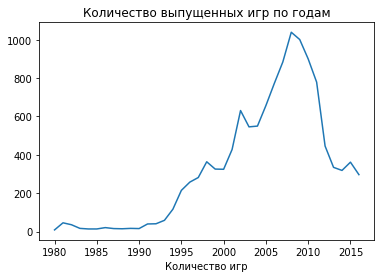

In [23]:
df.groupby('year_of_release')['name'].nunique().plot()


plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год')
plt.xlabel('Количество игр')
plt.show()

Виден резкий рост числа игр с середины 90х , затем спад после 2010 года. После 2010 года за 2 года выпуск игр сократился в 2 раза, к 2016 году количество игр сократилось до уровня 1997 года. Период ранее 2000 года можно вооще не рассматривать, он не важен для анализа в дальнейшем этот период сузим еще

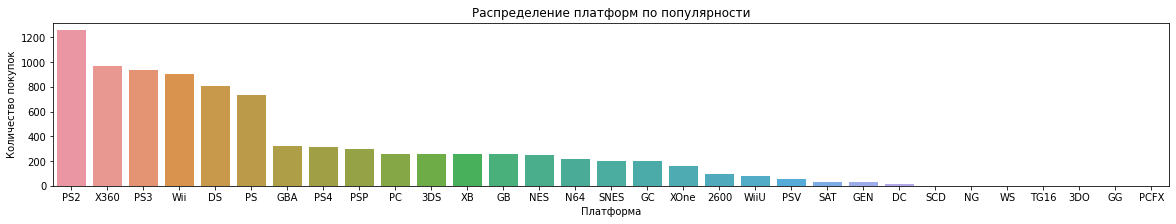

In [24]:
platforms = df.groupby('platform')['total_sales'].sum().sort_values(ascending  = False).reset_index()
plt.figure(figsize=(20, 3))
sns.barplot(x='platform', y='total_sales',  data=platforms)
#month_sales

plt.title('Распределение платформ по популярности')
plt.xlabel('Платформа')
plt.ylabel('Количество покупок')
plt.show()

За весь исследуемый период самыми популярными платформами были PS2, X360, Wii, PS3, DS. Для них посмотрим изменение продаж по годам

Text(0, 0.5, 'Выручка')

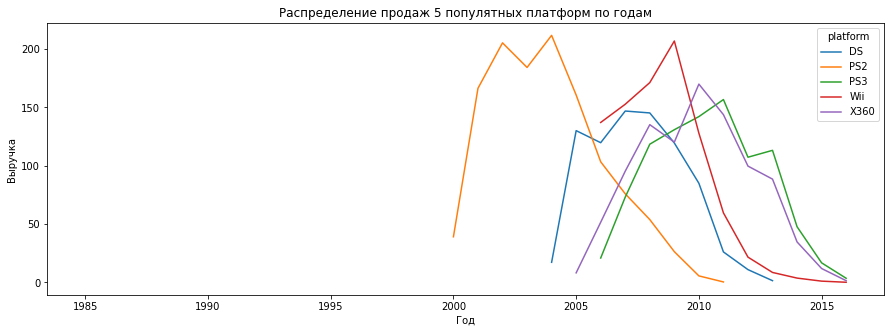

In [25]:
top_platforms = ['PS2', 'X360', 'Wii', 'PS3', 'DS']
df.query('platform in @top_platforms').pivot_table(index='year_of_release', 
                                                   columns = 'platform', 
                                                   values='total_sales', aggfunc='sum').plot(figsize=(15, 5))
plt.title('Распределение продаж 5 популятных платформ по годам')
plt.xlabel('Год')
plt.ylabel('Выручка')

Все выбранные платформы вели свою деятельность после 2000 года. Для каждой платформы характерен рост продаж, затем падение до начального уровня. Такой "период жизни" занимает примерно 10 лет для каждой платформы. Половину этого времени рост продаж у платформы растет, а половину - падает.  Поэтому для дальнейшего исследования и для построения прогноза на 2017 год возьмем данные за последние полные 5 лет (половина жизненного цикла платформы) - с 2011 по 2016 

In [26]:
df_actual = df[df['year_of_release'] >= 2011]
df_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60


In [27]:
df_actual.groupby('platform')['total_sales'].sum().sort_values(ascending  = False).reset_index().head()

,platform,total_sales
0,PS3,445.57
1,X360,380.38
2,PS4,314.14
3,3DS,257.81
4,XOne,159.32


В актуальном периоде по объему выручки лидируют PS3,X360, PS4

Построим график распределения выручки по годам для всех платформ за период 2011 - 2016

Text(0, 0.5, 'Выручка')

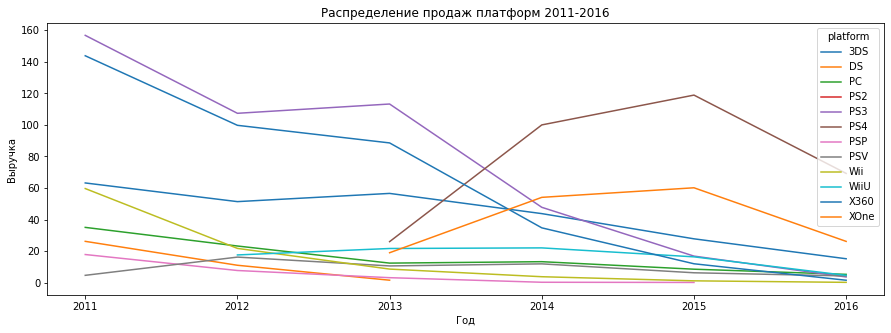

In [28]:

df_actual.pivot_table(index='year_of_release', columns = 'platform', 
                                                   values='total_sales', aggfunc='sum').plot(figsize=(15, 5))
plt.title('Распределение продаж платформ 2011-2016')
plt.xlabel('Год')
plt.ylabel('Выручка')

График выглядит перегруженным из-за присутствия более 10 платформ. Однако на нем заметно, что часть платформ перестала существовать до 2011 года, а часть появилась после того времени. Сделаем еще один график на временном интервале 2013 - 2016

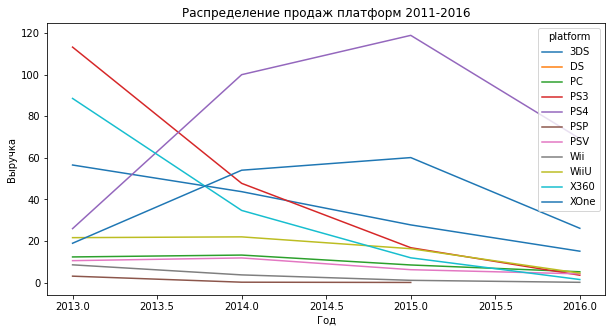

In [29]:
df[df['year_of_release'] >= 2013].pivot_table(index='year_of_release', columns = 'platform', 
                                                   values='total_sales', aggfunc='sum').plot(figsize=(10, 5))
plt.title('Распределение продаж платформ 2011-2016')
plt.xlabel('Год')
plt.ylabel('Выручка')
plt.show()

У всех платформ, даже у новых, продажи падают.Однако, учитывая факт, что данные за 2016 год могут быть неполными (вероятно на момент выгрузки данных 2016 год еще не закончился), то не следует рассматривать падение в 2016 году как 100% истину.  

Односительно стабильный уровень продаж у молодых WiiU, PSV. Платформы PS4 ， Xone показывали рост до 2015 года. Падение в 2016 году можеть быть вызвано неполнотой данных, поэтому можно предположить, что рост продаж продолжится (так как с момента появляения платформ прошло только 3 года) 


Итого, потенциально прибыльными можно считать платформы: 
* PS4
* XOne
* WiiU

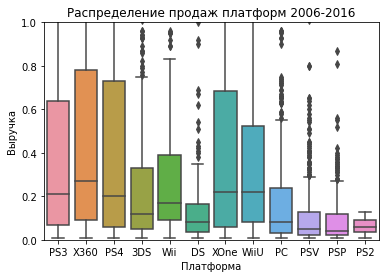

In [30]:
# строим график продаж игр в разбивке по платформам
sns.boxplot(data = df_actual, 
                      x = 'platform',
                      y = 'total_sales')
                      
plt.title('Распределение продаж платформ 2006-2016')
plt.xlabel('Платформа')
plt.ylabel('Выручка')
plt.ylim(0, 1)
plt.show()

Самое высокое медианное значение выручки за игру у платформ PS3, X360, XOne, PS4.  
Самое низкое - у DC, PC, PSV.  

Среди выбранных нами потенциально прибыльных платформ неплохие результаты показывают платформы wiiU (медианное значение продаж несильно отстает от X360), XOne.

Возьмем одну из наиболее успешных платформ за актуальный период времени - Х360. Посмотрим, влияют ли оценки пользователей и критиков на продажи

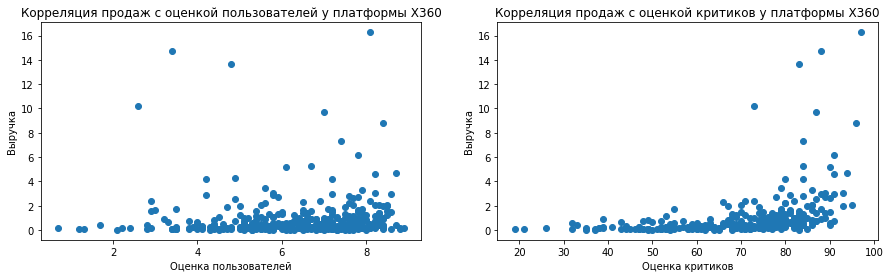

In [31]:
# строем диаграммы рассеяния для  оценки корреляции продаж и оценок пользователей и критиков для платформы X360
plt.figure(figsize=(15,4)) 
plt.subplot(1,2,1)

plt.scatter(x = 'user_score', y = 'total_sales', data = df_actual[df_actual['platform'] == 'X360'])
plt.title('Корреляция продаж с оценкой пользователей у платформы X360')
plt.xlabel('Оценка пользователей')
plt.ylabel('Выручка')
plt.subplot(1,2,2)
plt.scatter(x = 'critic_score', y = 'total_sales', data = df_actual[df_actual['platform'] == 'X360'])
plt.title('Корреляция продаж с оценкой критиков у платформы X360')
plt.xlabel('Оценка критиков')
plt.ylabel('Выручка')
plt.show()

На диаграммах не прослеживается четкая зависимость между оценками и уровнем продаж, однако какое-то влияние оценки все же могут оказывать (на графике с оценками критиков при высоких оценках более высокие продажи) . Посчитаем корреляцию

<AxesSubplot:>

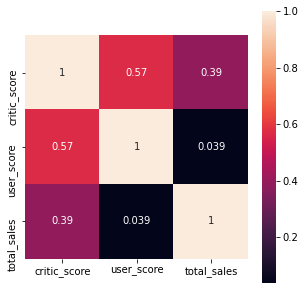

In [32]:

X360 = df_actual[df_actual['platform'] == 'X360']
cm = X360[['critic_score','user_score', 'total_sales']].corr() #вычисляем матрицу корреляций


from matplotlib.pyplot import figure

figure(figsize=(5, 5));

#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm, annot=True, square=True) #ваш код здесь

Корреляция общих продаж и оценки критиков - 0.39 , что не является очень сильной корреляцией, но можно сказать, что оценки критиков могут оказывать определенное влияние на продажи игры.  

Корреляция общих продаж и оценок пользователей составляет 0.039, можно сказать что тут оценки пользователей не влияют на уровень продаж

Посчитаем корреляцию для остальных платформ. Так как их все же много, то посмотрим корреляцию у выборочно у XOne, PS4, WiiU, PS3

In [33]:
XOne = df_actual.query('platform == "XOne"')
XOne_corr= XOne[['critic_score','user_score', 'total_sales']].corr()
XOne_corr


,critic_score,user_score,total_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
total_sales,0.416998,-0.068925,1.000000


In [34]:
PS4 = df_actual.query('platform == "PS4"')
PS4_corr= PS4[['critic_score','user_score', 'total_sales']].corr()
PS4_corr

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


In [35]:
WiiU = df_actual.query('platform == "WiiU"')
WiiU_corr= WiiU[['critic_score','user_score', 'total_sales']].corr()
WiiU_corr


,critic_score,user_score,total_sales
critic_score,1.00000,0.770080,0.348380
user_score,0.77008,1.000000,0.400219
total_sales,0.34838,0.400219,1.000000


In [36]:
_3DS = df_actual.query('platform == "3DS"')
_3DS_corr = _3DS[['critic_score','user_score', 'total_sales']].corr()
_3DS_corr

,critic_score,user_score,total_sales
critic_score,1.000000,0.745222,0.348740
user_score,0.745222,1.000000,0.222078
total_sales,0.348740,0.222078,1.000000


Можно заметить, что у всех платформ корреляция между уровнем продаж и оценками критиком примерно одинаковая 0.34-0.41. 

Что касается отзывов пользователей, то они оказывают большее влияние на продажи платформ, у которых пока что невысокие общие продажи ( 3DS, WiiU) , а у уже состоявшихся на рынке (XOne, PS4, X360) оценки пользователей никак не влияют на продажи

Построим диаграммы рассеяния для платформ, для которых мы посчитали корреляцию выше

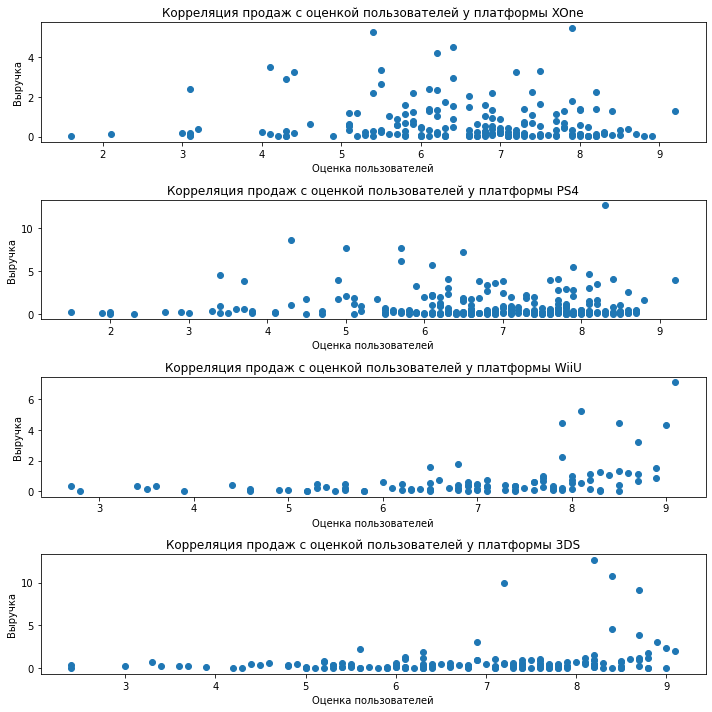

In [37]:
# диаграммы рассеяния: корреляция оценок пользователей и продаж
platforms = ['XOne', 'PS4', 'WiiU', '3DS']

fig, axes = plt.subplots(
    len( 
    platforms),1, figsize = (10,10))


for i,platform in enumerate(platforms): 
    
        axes[i].scatter(x = 'user_score', y = 'total_sales', data = df_actual[df_actual['platform'] == platform])
        
        axes[i].set_title(f'Корреляция продаж с оценкой пользователей у платформы {platform}')
        axes[i].set_xlabel('Оценка пользователей')
        axes[i].set_ylabel('Выручка')
        
plt.tight_layout()
    

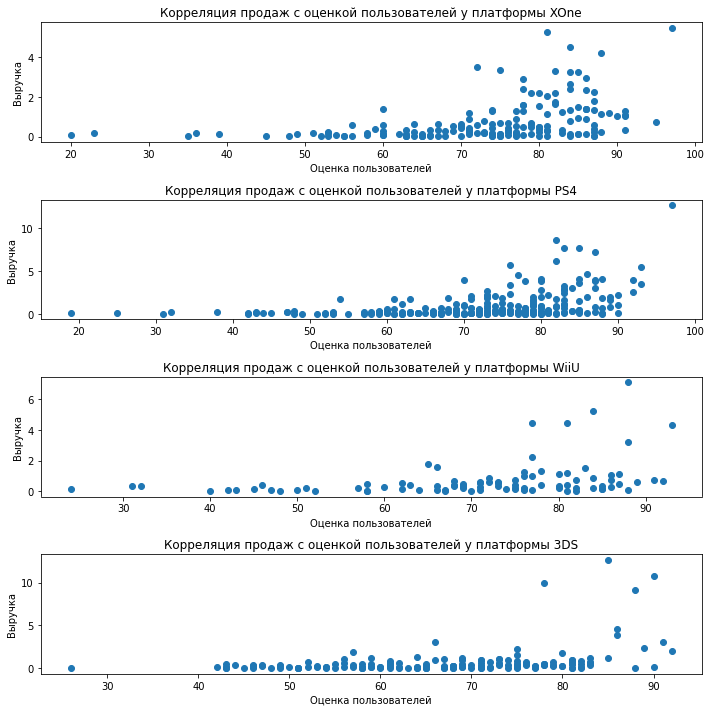

In [38]:
# диаграммы рассеяния: корреляция оценок критиков и продаж
platforms = ['XOne', 'PS4', 'WiiU', '3DS']

fig, axes = plt.subplots(
    len( 
    platforms),1, figsize = (10,10))


for i,platform in enumerate(platforms): 
    
        axes[i].scatter(x = 'critic_score', y = 'total_sales', data = df_actual[df_actual['platform'] == platform])
        
        axes[i].set_title(f'Корреляция продаж с оценкой пользователей у платформы {platform}')
        axes[i].set_xlabel('Оценка пользователей')
        axes[i].set_ylabel('Выручка')
        
plt.tight_layout()

По диаграммам так же видно, что оценки критиков сильнее влияют на продажи, чем оценки пользователей. При этом у платформ WiiU и 3DS оценки критиков влияют на продажи только небольшого числа игр

Изучим самые прибыльные жанры и количество игр в этих жанрах

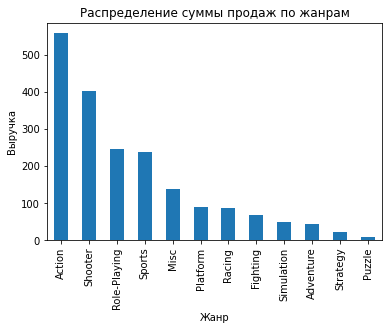

In [39]:
df_actual.groupby('genre')['total_sales'].sum().sort_values(ascending = False).plot(kind = 'bar')
plt.title('Распределение суммы продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Выручка')
plt.show()

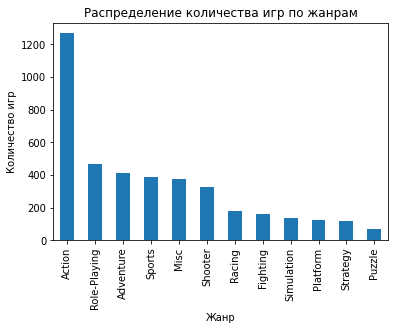

In [40]:
df_actual.groupby('genre')['name'].count().sort_values(ascending = False).plot(kind = 'bar')
plt.title('Распределение количества игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество игр')
plt.show()

In [41]:
# рассмотрим продажи по жанрам в относительных величинах - сумма продаж в отношении к количеству игр

genre= df_actual.groupby('genre').agg({'total_sales': 'sum', 'name': 'count'})
genre['sales_per_game'] = round(genre['total_sales'] / genre['name'] , 2)
genre.sort_values(by = 'sales_per_game', ascending = False).head()

,total_sales,name,sales_per_game
genre,,,
Shooter,402.91,329,1.22
Platform,88.68,122,0.73
Sports,237.15,389,0.61
Role-Playing,245.63,465,0.53
Racing,88.31,180,0.49


Игр в жанре 'Action' действительно больше по количеству, однако это не самый прибыльный жанр в относительных значениях. Самый прибыльный жанр при расчете прибыли за игру - Schooter. На втором месте - Platform (платформеры), а на третьем - Sports

**Выводы по разделу:**

* Средний срок существования платформы - 10 лет
* За период 2005 - 2016 самые высокие продажи были у платформ  X360, Wii, PS3
* Продажи на всех платформах падают, но с разной скоростью. Однако падение в 2016 году может быть обусловлено неполнотой данных по продажам за 2016 год
* Потенциально перспективные платформы - PS4, XOne, WiiU
* У всех платформ корреляция между уровнем продаж и оценками критиком примерно одинаковая 0.34-0.41 (не прямая зависимость, но определенное влияние есть). Оценки пользователей оказывают большее влияние на продажи у молодых платформ ( 3DS, WiiU) , а у уже состоявшихся на рынке (XOne, PS4, X360) оценки пользователей никак не влияют на продажи
* Чаще всего можно встретить игры жанров Action
* Самый прибыльный жанр при расчете прибыли за игру - Schooter. На втором месте - Platform (платформеры), а на третьем - Sports
    

### Портрет пользователя каждого региона

Для пользователя каждого региона (NA, EU, JP)определим : 
* Самые популярные платформы (топ-5). 
* Самые популярные жанры (топ-5).
* Влияет ли рейтинг ESRB на продажи в отдельном регионе

In [42]:
# ищем популярные платформы в североамериканском регионе
na_sales = df_actual.groupby('platform')['na_sales'].sum().sort_values(ascending = False).reset_index()
na_sales['%'] =round(na_sales['na_sales']/na_sales['na_sales'].sum()*100,2)
na_sales.head()

,platform,na_sales,%
0,X360,226.80,27.33
1,PS3,168.26,20.28
2,PS4,108.74,13.10
3,XOne,93.12,11.22
4,3DS,82.65,9.96


In [43]:
# популярные платформы в европейском регионе
eu_sales = df_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).reset_index()
eu_sales['%'] =round(eu_sales['eu_sales']/eu_sales['eu_sales'].sum()*100,2)
eu_sales.head()

,platform,eu_sales,%
0,PS3,163.10,24.35
1,PS4,141.09,21.06
2,X360,117.10,17.48
3,3DS,61.27,9.15
4,PC,56.70,8.47


In [44]:
# популярные платформы Японии  регионе
jp_sales = df_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).reset_index()
jp_sales['%'] =round(jp_sales['jp_sales']/jp_sales['jp_sales'].sum()*100,2)
jp_sales.head()

,platform,jp_sales,%
0,3DS,100.62,40.96
1,PS3,49.39,20.11
2,PSP,24.04,9.79
3,PSV,21.84,8.89
4,PS4,15.96,6.50


Можно заметить, что в Северной Америке наиболее высоки продажи на платформе X360 - американской платфоре, В Европе -PS3 (японская платформа),  в Японии - 3DS (японская платформа). Вероятно пользователям удобнее взаимодействовать с локальными платформами (помимо Европы,у которой, по видимому нет локальных платформ). Либо у этих платформ не получается выйти на международных рынок, но они успешно реализовались в стране выпуска

В Европейском регионе популярны как америранские, так и японские платформы



In [45]:
# популярные жанры в Америке
na_genre = df_actual.groupby('genre')['na_sales'].sum().sort_values(ascending = False).reset_index()
na_genre['%'] =round(na_genre['na_sales']/na_genre['na_sales'].sum()*100,2)
na_genre.head()

,genre,na_sales,%
0,Action,230.92,27.83
1,Shooter,194.43,23.43
2,Sports,108.70,13.10
3,Role-Playing,83.78,10.10
4,Misc,69.69,8.40


In [46]:
# популярные жанры в Европе
eu_genre = df_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending = False).reset_index()
eu_genre['%'] =round(eu_genre['eu_sales']/eu_genre['eu_sales'].sum()*100,2)
eu_genre.head()

,genre,eu_sales,%
0,Action,199.12,29.73
1,Shooter,148.02,22.10
2,Sports,88.48,13.21
3,Role-Playing,62.30,9.30
4,Racing,40.58,6.06


In [47]:
# популярные жанры в Японии
jp_genre = df_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending = False).reset_index()
jp_genre['%'] =round(jp_genre['jp_sales']/jp_genre['jp_sales'].sum()*100,2)
jp_genre.head()

,genre,jp_sales,%
0,Role-Playing,79.87,32.51
1,Action,63.62,25.90
2,Misc,17.60,7.16
3,Fighting,12.38,5.04
4,Platform,12.13,4.94


В Америке и Европе картина популярных жанров практически идентична - в тройку входят Action(27-29%), Shooter(22-23%), Sports (13%), причем в похожем соотношении 

Картина заметно отличается в Японии - там на первом месте Role_playing (32% всех продаж) , на втором месте Action(26%), а остальные жанры несильно популярны в Японии, у остальных доли меньше 8% от общих продаж в стране)

Различия в популядных жанрах могут быть обусловлены тем, что менталитет и образ жизни японцев сильно отличается от европейского

In [48]:
df_actual['rating'].unique()

array(['M', 'unknown', 'E', 'E10+', 'T', 'EC', 'RP'], dtype=object)

Найдем наиболее часто встречаемые рейтинги по регионам

In [49]:
# рейтинги в Америке
na_rating= df_actual.pivot_table(index='rating', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_rating

,na_sales
rating,
M,308.45
E,170.17
unknown,123.69
E10+,117.72
T,109.31
EC,0.42
RP,0.00


In [50]:
eu_rating= df_actual.pivot_table(index='rating', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_rating

,eu_sales
rating,
M,250.26
E,141.73
unknown,116.61
T,83.16
E10+,78.00
RP,0.03
EC,0.00


In [51]:
jp_rating= df_actual.pivot_table(index='rating', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_rating

,jp_sales
rating,
unknown,138.21
E,36.68
T,33.39
M,26.14
E10+,11.23
EC,0.00
RP,0.00



По имеющимся данным можно увидеть, что в США  самые часто встречаемые рейтинги -  М ("Для взрослых") и  E(«Для всех»). Также много игр, где рейтинг не указан 

в Японии популярны игры E («Для всех») и Т ("Для подростков").Вероятно, в Японии молодые люди чаще играют в компьютер, чем взрослые. Однако больше всего игр, где рейтинг ESRB не указан в связи с нем, что данная система возрастного рейтинга по большей части применяется для игр, реализуемых в США и Канаде.

Во всех регионах очень низкие продажи игр категории EC  («Для детей младшего возраста»). Это может быть связано с тем, что маленькие дети в целом редко играют в компьютер 


Итак , портреты среднестатистического покупателя в регионах: 

**Северная Америка**:

* Взрослый человек, который предпочитает платформу X360, игры в стиле Action,либо Shooter

**Европа**:

* Взрослый человек, который предпочитает платформу PS3, игры в стиле  Action,либо Shooter


**Япония**:

* Молодой человек, который предпочитает платформу DS, игры в стиле  Role-Playing либо Action

### Проверка гипотез

Для проверки обеих гипотез будем использовать t-критерий Стьюдента, т.к. в обоих случаях выборки независимы между собой.


**Нулевая гипотеза 1**:Средние пользовательские рейтинги платформ Xbox One и PC одинаковые  
**Альтернативная гипотеза 1**: Средние пользовательские рейтинги платформ Xbox One и PC разные  

Проведем стат.тест.   
В качестве alpha выставим 0.05. 
Если посчитанные p-value окажется меньше альфа, то гипотеза не подтвердится

In [52]:
# для проверки гипотезы проведем стат.тест
print('Выборочное среднее значение пользовательского рейтинга платформы Xbox One  ', 
      round(df_actual.loc[df_actual['platform'] == 'XOne', 'user_score'].mean(),2))
print('Выборочное среднее значение пользовательского рейтинга платформы PC',
      round(df_actual.loc[df_actual['platform'] == 'PC', 'user_score'].mean(),2))

# задаём уровень значимости 
alpha = 0.05

results = st.ttest_ind(
    df_actual.loc[df_actual['platform'] == 'XOne', 'user_score'].dropna(),
    df_actual.loc[df_actual['platform'] == 'PC', 'user_score'].dropna(),
    equal_var=False,
    alternative='two-sided'
)

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть')


Выборочное среднее значение пользовательского рейтинга платформы Xbox One   6.52
Выборочное среднее значение пользовательского рейтинга платформы PC 6.45
p-value: 0.6130712247638477
Нет оснований отвергнуть


Итак, мы не отвергаем гипотезу о том, что средние пользовательские рейтинги на платформах Xone и PC равны. Скорее всего среднее значение близко друг к другу

**Нулевая гипотеза 2**: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые 

**Альтернативная гипотеза 2**: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports разные

In [53]:
action = df_actual.loc[df_actual['genre'] == 'Action']
sports = df_actual.loc[df_actual['genre'] == 'Sports']

print('Выборочное среднее значение пользовательского рейтинга жанра Action  ', round(action['user_score'].mean(),2))
print('Выборочное среднее значение пользовательского рейтинга жанра Sports',round(sports['user_score'].mean(),2))

# задаём уровень значимости 
alpha = 0.05


# проводим ttest для двух выборок
results = st.ttest_ind(action['user_score'].dropna(), sports['user_score'].dropna())

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

Выборочное среднее значение пользовательского рейтинга жанра Action   6.78
Выборочное среднее значение пользовательского рейтинга жанра Sports 5.65
p-value: 5.1974550252152054e-24
Отвергаем нулевую гипотезу


Итак гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые, нами отвергнута в пользу альтернативной. Значит, что средние пользовательские рейтинги  этих жанров скорее всего отличаются 

**Итоги проверки гипотез**: 

* Гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые не подтвердилась, скорее всего средние пользовательские рейтинги этих платформ разные
* Гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные отвергнуть не получилось. Скорее всего они они практически одинаковые

### Выводы по проекту

**1) Предобработка данных**: Данные достаточно чистые, без дубликатов, однако есть много пропусках в определенных столбцах, которые сложно заполнить ('critic_score', 'user_score', 'rating').   
Больше всего пропусков в столбке c рейтингом  ESRB, что может говорить либо о том, что рейтинг еще не определен, либо о нежелании владельца игры его указывать  . Больше всего пропусков в играх, которые продавались в Японии - 


**2) Исследовательский анализ данных**: 

* Средний срок существования платформы - 10 лет
* За период 2005 - 2016 самые высокие продажи были у платформ X360, Wii, PS3
* Продажи на всех платформах падают, но с разной скоростью. Также учитывая факт, что данные за 2016 год могут быть неполными, то вероятно для некоторых платформ падение в 2016 году - результат неполноты данных по продажам за 2016 год
* Потенциально перспективные платформы в 2017 году -PS4, XOne, WiiU
* У всех платформ корреляция между уровнем продаж и оценками критиком примерно одинаковая 0.34-0.41 (не прямая зависимость, но определенное влияние есть). Оценки пользователей оказывают большее влияние на продажи у молодых платформ с низкими продажами (3DS, WiiU) , а у уже состоявшихся на рынке (XOne, PS4, X360) оценки пользователей никак не влияют на продажи
* Чаще всего можно встретить игры жанров Action, также часто встречаются Sports и Misc
* Самый прибыльный жанр при расчете прибыли за игру - Schooter. На втором месте - Platform (платформеры), а на третьем - Sports


**3) Портрет пользователя каждого региона**

**Северная Америка:**

Топ-5 платформ: 

- X360	
- PS3	
- PS4	
- XOne	
- 3DS	

Топ-5 жанров: 
 - Action	
- Shooter	
- Sports	
- Role-Playing	
- Misc	

Основные рейтинги:  М ("Для взрослых"), E(«Для всех»)

Портрет пользователя игр из Северной Америки:  Взрослый человек, который предпочитает платформу X360, игры в стиле Action,либо Shooter

**Европа**

Топ-5 платформ:

- PS3	
- PS4	
- X360	
- 3DS
- PC	

Топ-5 жанров: 

- Action
- Shooter	
- Sports
- Role-Playing	
- Racing	

Основные рейтинги: E(«Для всех»), М ("Для взрослых"), Т ("Для подростков")

Портрет пользователя игр из Европы: Взрослый человек, который предпочитает платформу PS3, игры в стиле  Action,либо Shooter

**Япония**

Топ-5 платформ:

- 3DS	
- PS3
- PSP	
- PSV	
- PS4	

Топ-5 жанров: 
- Role-Playing	
- Action	
- Misc	
- Fighting	
- Platform	

Основные рейтинги: E(«Для всех»), Т ("Для подростков"). В Японии игр с рейтингом T больше, чем М, вероятно молодые люди чаще играют в компьютер, чем взрослые. При этом у большей части игр не указан рейтинг ESRB (так как он предназначен по большей части для США и Канады) 

Портрет пользователя игр из Японии:  Молодой человек, который предпочитает платформу DS, игры в стиле  Role-Playing либо Action

В Северной Америке и Европе популярные жанры и возрастные рейтинги очень схожи, в то время как портрет среднестатистического пользователя из Японии заметно отличается. Это может быть обусловлено тем,  что менталитет и образ жизни японцев сильно отличается от европейского

**4) Проверка гипотез** 


* Гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые не может быть отвергнута. Похоже, что средние рейтинги очень схожи.
* Гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые мы отвергли. Средние пользовательские рейтинги жанров Action и Sports разные.



**Рекомендации:**  в 2017 году стоит делать ставки на игры в жанрах Shooter, Action и Sports в категории "Для всех", не забывать про отличия Японии от остальных регионов (популярность жанра Role-Playing и значительная часть молодежи среди покупателей) 



